# LSIの配線のインピーダンス解析

Conductor 1 charge density range: 1.429944049173709e-12 3.5207418165784302e-12
Conductor 1 total charge: 3.191291745034958e-19
Conductor 2 charge density range: -4.9018428070106534e-12 -2.0721158891950663e-12
Conductor 2 total charge: -4.527042291520365e-19
Conductor 3 charge density range: 2.840415180652146e-12 6.848698850207612e-12
Conductor 3 total charge: 6.220120877933381e-19


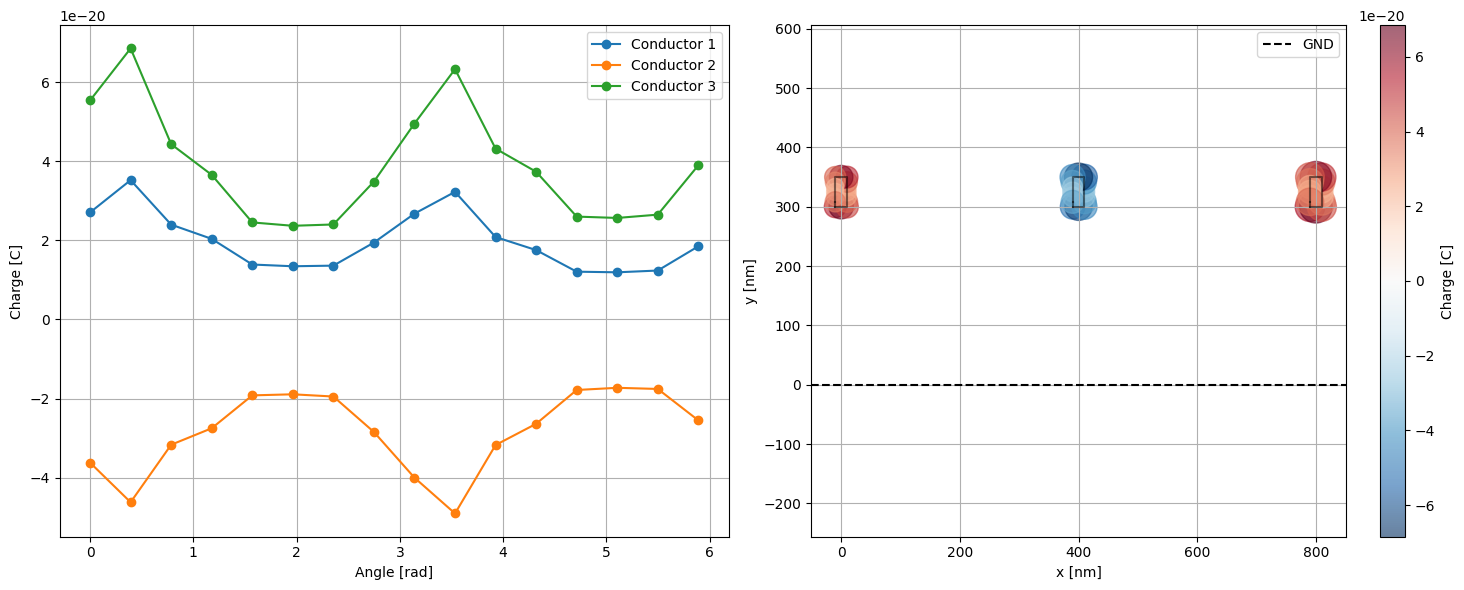

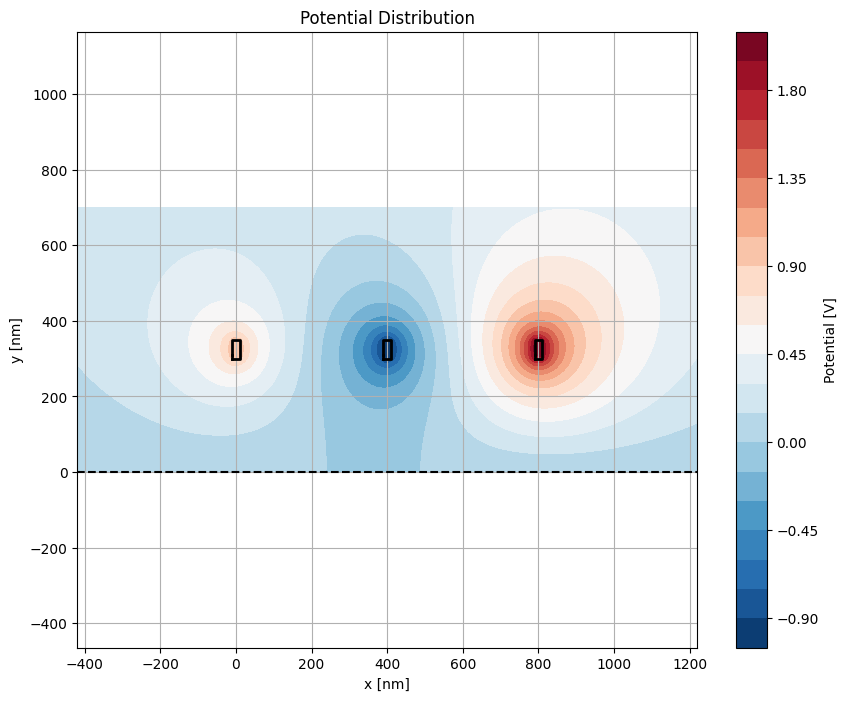

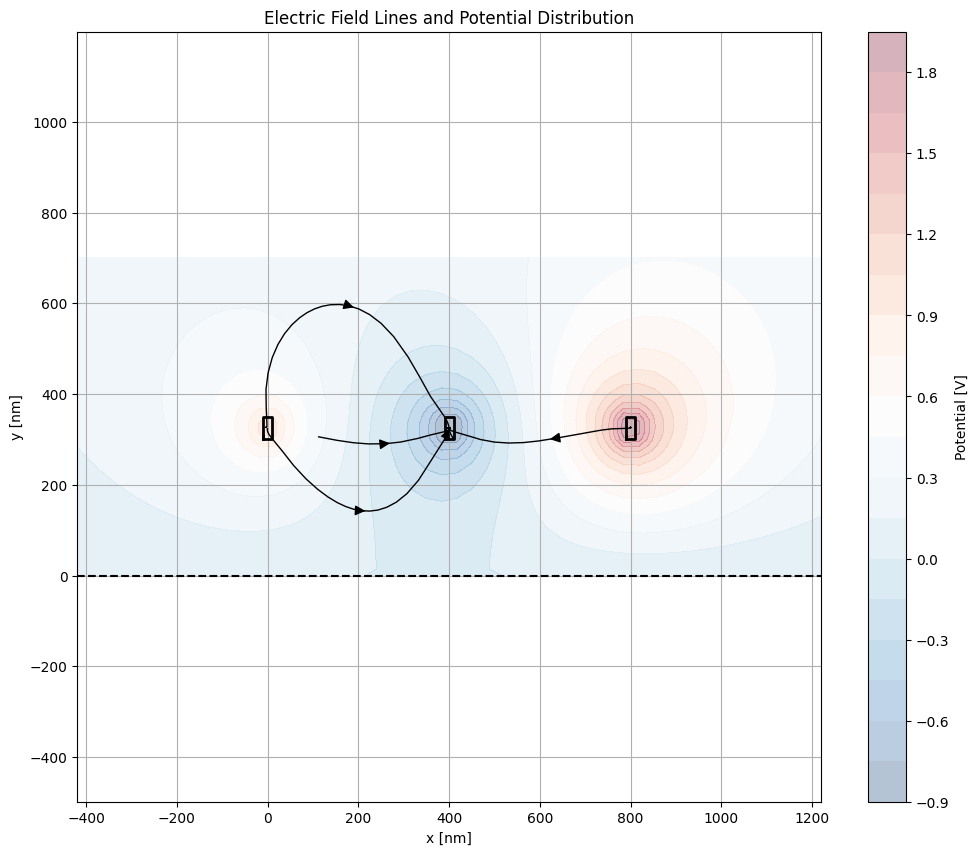


 C Matrix [F/m]:
[[ 3.27389304e-11 -5.73207208e-12 -1.30011571e-12]
 [-5.73207208e-12  3.37011908e-11 -5.73207208e-12]
 [-1.30011571e-12 -5.73207208e-12  3.27389304e-11]]

 L Matrix [H/m]:
[[3.52085369e-07 6.41736445e-08 2.52176740e-08]
 [6.41736445e-08 3.51974520e-07 6.41736445e-08]
 [2.52176740e-08 6.41736445e-08 3.52085369e-07]]

 Z Matrix [H/m]:
[[107.55867601  64.85598915  44.34118837]
 [ 64.85598915 108.97172502  64.85598915]
 [ 44.34118837  64.85598915 107.55867601]]
Capacitance matrix has been saved to ./out/test_rect3x1.csv


In [ ]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# RECT 3x1のテスト
def test_rect3x1():
  calculator = MultiConductorCalculator(epsilon_r=2.0)
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9

  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect3x1.csv", unit_prefix='f' , length=1e-6 )


# RECT 5x5のテスト
def test_rect5x5():
  calculator = MultiConductorCalculator(epsilon_r=2.0)
    
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  bh2 = 400e-9
  bh3 = 500e-9
  bh4 = 600e-9
  bh5 = 700e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9
  xo4 = 1200e-9
  xo5 = 1600e-9
    
  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo5  )

  # Modified voltages array to match the number of conductors
  voltages = [0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,1.0, 1.0, 1.0, 0.0]  # Only one voltage for one conductor
  
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect5x5.csv", unit_prefix='f' , length=1e-6 )


if __name__ == "__main__":
  test_rect3x1()
  test_rect5x5()
